# TensorFlow 2.0: How to fine-tune and save a model?

When we apply deep learning in the computer vision domain, there are many difficulties like:
* Deep neural networks start to pay off when we have sufficient data, but more often than not, this is not the case. Furthermore, data is expensive and sometimes impossible to expand.
* Deep neural networks contain a wide range of parameters that need tuning and can affect the model's overall performance.
* Deep learning is very resource-intensive in terms of time, hardware, and effort.

With transfer learning, we can save ourselves loads of time and effort by leveraging the rich amount of knowledge present in seminal architectures that have been pre-trained on enormous datasets, such as ImageNet.

Perhaps one of the greatest advantages of transfer learning is its ability to seize the tailwind produced by the knowledge encoded in pre-trained networks. By simply swapping the shallower layers in one of these networks, we can obtain remarkable performance on new, unrelated datasets, even if our data is small. Why? Because the information in the bottom layers is virtually universal: It encodes basic forms and shapes that apply to almost any computer vision problem.

we'll fine-tune a pre-trained VGG16 network on a tiny dataset, achieving an otherwise unlikely high accuracy score. We'll be using a dataset known as 17 Category Flower Dataset, which is available here: http://www.robots.ox.ac.uk/~vgg/data/flowers/17. Download and decompress it in a location of your choosing. From now on, we'll assume the data is in `~/.keras/datasets/flowers17`.

In [4]:
### not Python commands but Linux commands
# Download the dataset
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
# Create a new directory to store the extracted dataset in it
!mkdir -p  ~/.keras/datasets/flowers17
# Unzip the dataset
!tar  -xzvf 17flowers.tgz -C ~/.keras/datasets/flowers17
# -x : Extract file
# -z : Deal with compressed file i.e. filter the archive through gzip
# -v : Verbose output i.e. show progress
# -f : File, work on data.tgz file.
# -C /path/to/dir/ : Extract files in /path/to/dir/ directory instead of the current directory on Linux

--2021-04-27 09:07:50--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz.2’

17flowers.tgz.2     100%[===================>]  57,48M  8,73MB/s    in 6,6s    

2021-04-27 09:07:57 (8,72 MB/s) - ‘17flowers.tgz.2’ saved [60270631/60270631]

jpg/files.txt
jpg/files.txt~
jpg/image_0001.jpg
jpg/image_0002.jpg
jpg/image_0003.jpg
jpg/image_0004.jpg
jpg/image_0005.jpg
jpg/image_0006.jpg
jpg/image_0007.jpg
jpg/image_0008.jpg
jpg/image_0009.jpg
jpg/image_0010.jpg
jpg/image_0011.jpg
jpg/image_0012.jpg
jpg/image_0013.jpg
jpg/image_0014.jpg
jpg/image_0015.jpg
jpg/image_0016.jpg
jpg/image_0017.jpg
jpg/image_0018.jpg
jpg/image_0019.jpg
jpg/image_0020.jpg
jpg/image_0021.jpg
jpg/image_0022.jpg
jpg/image_0023.jpg
jpg/image_0

jpg/image_0427.jpg
jpg/image_0428.jpg
jpg/image_0429.jpg
jpg/image_0430.jpg
jpg/image_0431.jpg
jpg/image_0432.jpg
jpg/image_0433.jpg
jpg/image_0434.jpg
jpg/image_0435.jpg
jpg/image_0436.jpg
jpg/image_0437.jpg
jpg/image_0438.jpg
jpg/image_0439.jpg
jpg/image_0440.jpg
jpg/image_0441.jpg
jpg/image_0442.jpg
jpg/image_0443.jpg
jpg/image_0444.jpg
jpg/image_0445.jpg
jpg/image_0446.jpg
jpg/image_0447.jpg
jpg/image_0448.jpg
jpg/image_0449.jpg
jpg/image_0450.jpg
jpg/image_0451.jpg
jpg/image_0452.jpg
jpg/image_0453.jpg
jpg/image_0454.jpg
jpg/image_0455.jpg
jpg/image_0456.jpg
jpg/image_0457.jpg
jpg/image_0458.jpg
jpg/image_0459.jpg
jpg/image_0460.jpg
jpg/image_0461.jpg
jpg/image_0462.jpg
jpg/image_0463.jpg
jpg/image_0464.jpg
jpg/image_0465.jpg
jpg/image_0466.jpg
jpg/image_0467.jpg
jpg/image_0468.jpg
jpg/image_0469.jpg
jpg/image_0470.jpg
jpg/image_0471.jpg
jpg/image_0472.jpg
jpg/image_0473.jpg
jpg/image_0474.jpg
jpg/image_0475.jpg
jpg/image_0476.jpg
jpg/image_0477.jpg
jpg/image_0478.jpg
jpg/image_04

jpg/image_0942.jpg
jpg/image_0943.jpg
jpg/image_0944.jpg
jpg/image_0945.jpg
jpg/image_0946.jpg
jpg/image_0947.jpg
jpg/image_0948.jpg
jpg/image_0949.jpg
jpg/image_0950.jpg
jpg/image_0951.jpg
jpg/image_0952.jpg
jpg/image_0953.jpg
jpg/image_0954.jpg
jpg/image_0955.jpg
jpg/image_0956.jpg
jpg/image_0957.jpg
jpg/image_0958.jpg
jpg/image_0959.jpg
jpg/image_0960.jpg
jpg/image_0961.jpg
jpg/image_0962.jpg
jpg/image_0963.jpg
jpg/image_0964.jpg
jpg/image_0965.jpg
jpg/image_0966.jpg
jpg/image_0967.jpg
jpg/image_0968.jpg
jpg/image_0969.jpg
jpg/image_0970.jpg
jpg/image_0971.jpg
jpg/image_0972.jpg
jpg/image_0973.jpg
jpg/image_0974.jpg
jpg/image_0975.jpg
jpg/image_0976.jpg
jpg/image_0977.jpg
jpg/image_0978.jpg
jpg/image_0979.jpg
jpg/image_0980.jpg
jpg/image_0981.jpg
jpg/image_0982.jpg
jpg/image_0983.jpg
jpg/image_0984.jpg
jpg/image_0985.jpg
jpg/image_0986.jpg
jpg/image_0987.jpg
jpg/image_0988.jpg
jpg/image_0989.jpg
jpg/image_0990.jpg
jpg/image_0991.jpg
jpg/image_0992.jpg
jpg/image_0993.jpg
jpg/image_09

the goal of this notebook is to demonstate the power of transfer learning, especially considering we only have 81 images per class in the dataset (81x17=1,377 in total), an insufficient amount for training a good performing deep learning model from scratch.

<table>
  <tr><td>
    <img src="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/categories.jpg"
         alt="Fashion MNIST sprite"  width="300">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://www.robots.ox.ac.uk/~vgg/data/flowers/17/">17 Category Flower Dataset</a>&nbsp;
  </td></tr>
</table>

In [1]:
import os
import pathlib
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import plot_model

In [3]:
# Set the random seed:
SEED = 999

## Dataset
Define a function that will load the images and labels in the dataset as NumPy arrays:

In [5]:
#80 images for each class. Class 0 data is from 0-79, Class 1 is 80-159
def load_images_and_labels(image_paths,
                           target_size=(256, 256)):
    j      = 0
    images = []
    labels = []

    for i,image_path in enumerate(image_paths):
        image = load_img(image_path, 
                         target_size=target_size)
        image = img_to_array(image)
        if i%80== 0:
            j +=1
        label = j
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

Load the image paths and extract the set of classes from them:

In [6]:
# f"" str.format() 
# it is importent to sort the path of images 
j = 1
total = 1361
image_paths = []
for i  in range(1, total):
    fpath    =  f"image_{str(i).zfill(4)}.jpg"
    dataset_path = (pathlib.Path.home() / '.keras' / 
                    'datasets' /'flowers17'/'jpg'/fpath)
    image_paths.append(str(dataset_path))
# print(image_paths[:5])

Load the images and normalize them, one-hot encode the labels with LabelBinarizer(), and split the data into subsets for training (80%) and testing (20%):

In [7]:
X, y = load_images_and_labels(image_paths)
# Normalization
X = X.astype('float') / 255.0
# One-hot encode the labels with LabelBinarizer()
y = LabelBinarizer().fit_transform(y)
# Split the data
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                     test_size=0.2,
                                                     random_state=SEED)

CLASSES = 17

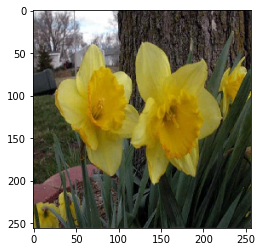

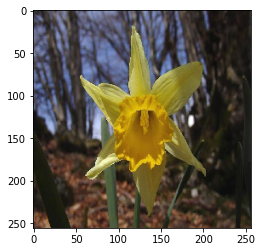

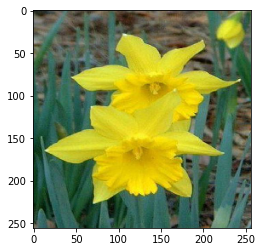

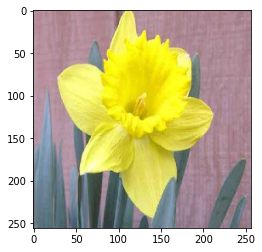

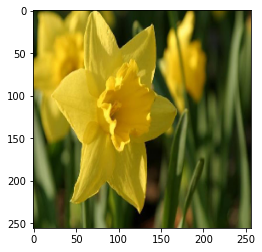

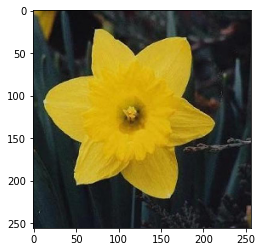

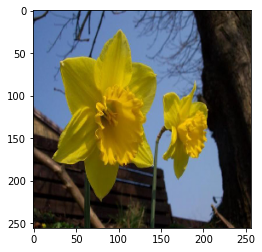

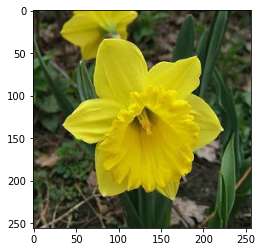

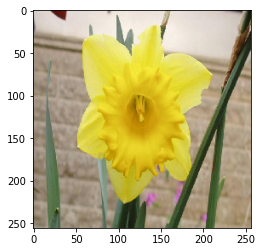

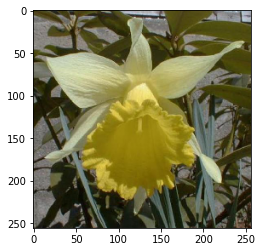

In [8]:
for x in X[:10]:
    plt.imshow(x)
    plt.show()

## Build the Model

Define a function that will build a new network from a pre-trained model, where the top fully connected layers will be brand new and adapted to the problem at hand:

In [9]:
def build_network(base_model, classes):
    x = Flatten()(base_model.output)
    x = Dense(units=256)(x)
    x = ReLU()(x)
    x = BatchNormalization(axis=-1)(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(units=classes)(x)
    output = Softmax()(x)
    return output

## VGG16
* The maximum filter size is 3 x 3 and the minimum size is 1 x 1. This means that a smaller filter size with a larger quantity is used, compared to a larger filter size and smaller quantity for AlexNet; this results in fewer parameters compared to AlexNet.
* Convolution stride is 1 and padding is 1 for a 3 x 3 convolutional layer. Max pooling is performed over a 2 x 2 window with a stride of 2.
* Three nonlinear ReLU functions are used instead of a single one in each layer, which makes the decision function more discriminative by reducing the vanishing gradient problem and enabling the network to learn deeply. Learning deeply here means learning complex shapes, such as edges, features, boundaries, and so on.
* The total number of parameters is 138 million.

Instantiate a pre-trained VGG16, without the top layers. Specify an input shape of 256x256x3:

In [10]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_tensor=Input(shape=(256, 256, 
                                              3)))

Freeze all the layers in the base model. We are doing this because we don't want to re-train them, but use their existing knowledge:

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

## Full Network
Build the full network with a new set of layers on top using build_network() (defined in Step 3):

In [13]:
model = build_network(base_model, CLASSES)
model = Model(base_model.input, model)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

## Visualizing a model's architecture
The visualization of a model is done by calling `plot_model()` for the variable that contains it. However, in order for it to work, we need to make sure that we have the necessary dependencies installed; for example, `pydot`.

In [15]:
!pip install pydot

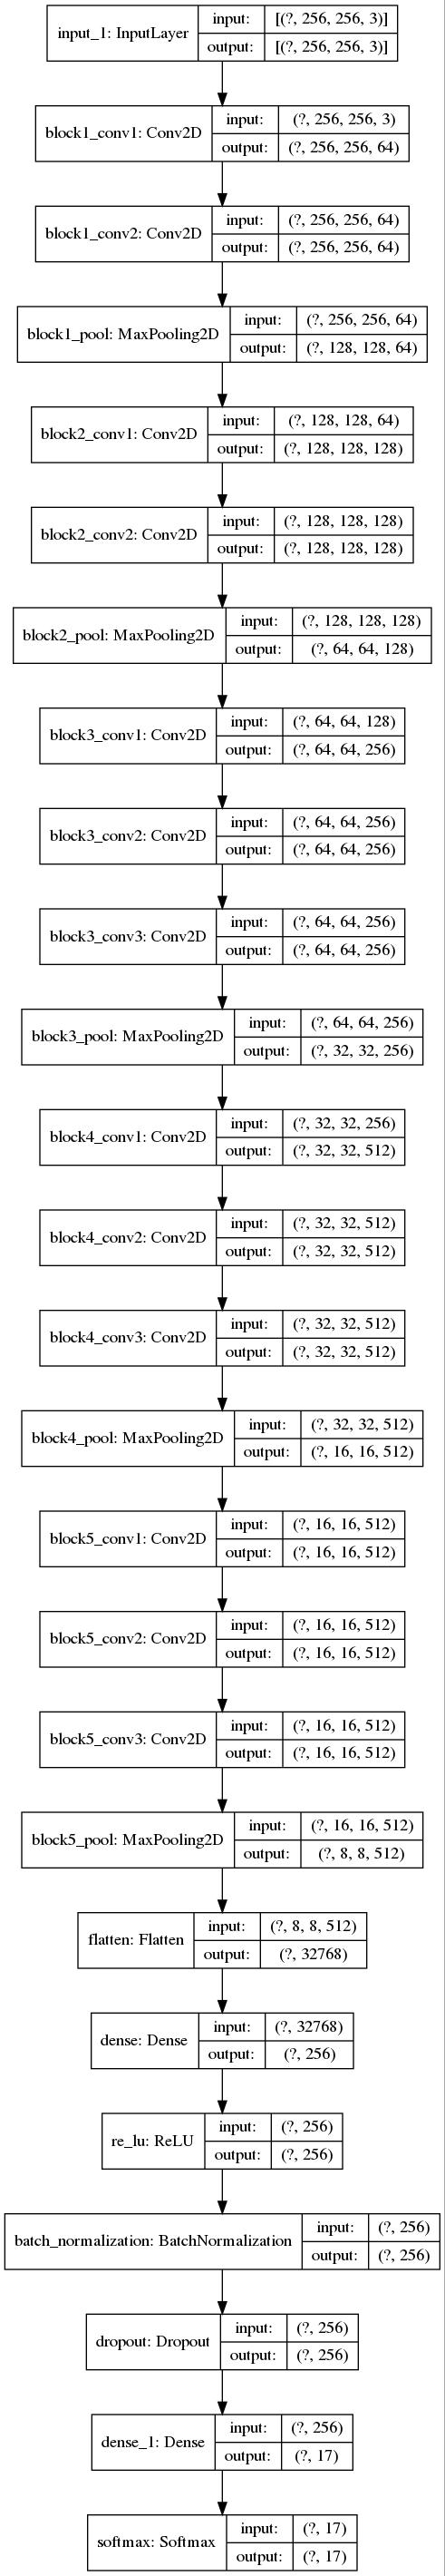

In [17]:
visdir = pathlib.Path.home() / '.keras' /"models"
if not os.path.exists(visdir):
    os.makedirs(visdir)
plot_model(model, 
           show_shapes=True, 
           show_layer_names=True, 
           to_file=visdir /'my_model.jpg')

## Data Augmentation
Define the batch size and a set of augmentations to be applied through `ImageDataGenerator()`:

In [18]:
BATCH_SIZE = 64
augmenter = ImageDataGenerator(rotation_range=30,
                               horizontal_flip=True,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.2,
                               zoom_range=0.2,
                               fill_mode='nearest')
train_generator = augmenter.flow(X_train, y_train, 
                                 BATCH_SIZE)

Use `callbacks.TensorBoard` to generate TensorBoard logs for the training.

In [19]:
def get_callbacks(name):
    return [
        tf.keras.callbacks.TensorBoard(logdir/name),
    ]

## Warming Training

We then train the network using a very small learning rate so the new set of fully connected layers can learn patterns from the previously learned CONV layers earlier in the network — this process is called allowing the FC layers to **“warm up”**.

This means we'll only train the new layers (the rest are frozen) for 20 epochs, using RMSProp with a learning rate of 0.001. Finally, we'll evaluate the network on the test set:

In [20]:
logdir = pathlib.Path.home() / '.keras' /"tensorboard_logs"
# Delete an entire directory tree
shutil.rmtree(logdir, ignore_errors=True)

In [21]:
WARMING_EPOCHS = 20
name = "Warming"
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-3),
              metrics=['accuracy'])
model.fit(train_generator,
          steps_per_epoch=len(X_train) // BATCH_SIZE,
          validation_data=(X_test, y_test),
          callbacks=get_callbacks(name),
          epochs=WARMING_EPOCHS)

result = model.evaluate(X_test, y_test)
print(f'Test accuracy: {result[1]}')

Epoch 1/20
17/17 [==============================] - 67s 4s/step - loss: 2.1315 - accuracy: 0.4013 - val_loss: 3.4333 - val_accuracy: 0.4632
Epoch 2/20
17/17 [==============================] - 65s 4s/step - loss: 0.7184 - accuracy: 0.8036 - val_loss: 2.2503 - val_accuracy: 0.5147
Epoch 3/20
17/17 [==============================] - 66s 4s/step - loss: 0.5486 - accuracy: 0.8500 - val_loss: 1.3213 - val_accuracy: 0.6949
Epoch 4/20
17/17 [==============================] - 67s 4s/step - loss: 0.4082 - accuracy: 0.8913 - val_loss: 1.1027 - val_accuracy: 0.7243
Epoch 5/20
17/17 [==============================] - 67s 4s/step - loss: 0.3543 - accuracy: 0.9169 - val_loss: 0.9095 - val_accuracy: 0.7537
Epoch 6/20
17/17 [==============================] - 67s 4s/step - loss: 0.2948 - accuracy: 0.9272 - val_loss: 1.1210 - val_accuracy: 0.7206
Epoch 7/20
17/17 [==============================] - 67s 4s/step - loss: 0.2693 - accuracy: 0.9371 - val_loss: 0.5526 - val_accuracy: 0.8272
Epoch 8/20
17/17 [==

### View in TensorBoard
Open an embedded  TensorBoard viewer inside a notebook:

In [22]:
%load_ext tensorboard

In [ ]:
#docs_infra: no_execute
%tensorboard --logdir {logdir}

## Last Step (Optionally)

we may unfreeze the rest of the network and continue training. Applying fine-tuning allows us to utilize pre-trained networks to recognize classes they were not originally trained on.

We'll fine-tune the final layers of the base model, specifically from the 16th onward (remember, zero-indexing), along with the fully connected layers, for 50 epochs, using SGD with a learning rate of 0.001:

In [24]:
for layer in base_model.layers[15:]:
    layer.trainable = True
EPOCHS = 50
name = "Fine-tuning"
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1e-3),
              metrics=['accuracy'])
model.fit(train_generator,
          steps_per_epoch=len(X_train) // BATCH_SIZE,
          validation_data=(X_test, y_test),
          callbacks=get_callbacks(name),
          epochs=EPOCHS)
result = model.evaluate(X_test, y_test)
print(f'Test accuracy: {result[1]}')

Epoch 1/50
17/17 [==============================] - 83s 5s/step - loss: 0.1073 - accuracy: 0.9801 - val_loss: 0.5267 - val_accuracy: 0.8346
Epoch 2/50
17/17 [==============================] - 82s 5s/step - loss: 0.0952 - accuracy: 0.9877 - val_loss: 0.4578 - val_accuracy: 0.8603
Epoch 3/50
17/17 [==============================] - 83s 5s/step - loss: 0.1170 - accuracy: 0.9758 - val_loss: 0.4101 - val_accuracy: 0.8676
Epoch 4/50
17/17 [==============================] - 83s 5s/step - loss: 0.0755 - accuracy: 0.9912 - val_loss: 0.3818 - val_accuracy: 0.8713
Epoch 5/50
17/17 [==============================] - 83s 5s/step - loss: 0.0842 - accuracy: 0.9852 - val_loss: 0.3614 - val_accuracy: 0.8934
Epoch 6/50
17/17 [==============================] - 83s 5s/step - loss: 0.1025 - accuracy: 0.9791 - val_loss: 0.3453 - val_accuracy: 0.9007
Epoch 7/50
17/17 [==============================] - 83s 5s/step - loss: 0.0857 - accuracy: 0.9784 - val_loss: 0.3304 - val_accuracy: 0.9044
Epoch 8/50
17/17 [==

In [ ]:
#docs_infra: no_execute
%tensorboard --logdir {~/.keras/tensorboard_logs}

The tensorboard should look like this

<table>
  <tr><td>
    <img src="https://imgur.com/6vyRWcp.png"
         alt="Tensorboard"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> 
  </td></tr>
</table>


## Saving and loading a model
Training a neural network is hard work and time-consuming. That's why retraining a model every time is impractical. The good news is that we can save a network to disk and load it whenever we need it, whether to improve its performance with more training or to use it to make predictions on fresh data. In this recipe, we'll learn about different ways to persist a model.

Save the model, along with its weights, in `HDF5` format using the `save()` method. Then, load the persisted model using `load_model()` and evaluate the network's performance on the test set:

In [33]:
# Saving model and weights as HDF5.
modeldir = pathlib.Path.home() / '.keras' /'models'
model.save(modeldir/ 'model_and_weights.hdf5')

In [34]:
from tensorflow.keras.models import load_model
# Loading model and weights as HDF5.
loaded_model = load_model(modeldir/ 'model_and_weights.hdf5')

In [35]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

Implement a function that will evaluate a network using the test set:

In [36]:
def evaluate(model, X_test, y_test):
    _, accuracy = model.evaluate(X_test, y_test, 
                                 verbose=0)
    print(f'Accuracy: {accuracy}')

In [37]:
# Predicting using loaded model.
evaluate(loaded_model, X_test, y_test)

Accuracy: 0.9227941036224365


You can also store the model separately from the weights – the former in `JSON` format and the latter in `HDF5` – using `to_json()` and `save_weights()`, respectively. The advantage of this approach is that we can copy a network with the same architecture from scratch using the `model_from_json()` function. The downside, though, is that we need more function calls, and this effort is rarely worth it.

## References
* How to extract tgz file in Linux, https://www.nixcraft.com/t/how-to-extract-tgz-file-in-linux/1925
* 17 category flowers, https://www.kaggle.com/saidakbarp/17-category-flowers
* TensorFlow 2.0 Computer Vision Cookbook, https://www.packtpub.com/
* Fine-tuning with Keras and Deep Learning, https://www.pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/